In [1]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [2]:
!git clone https://github.com/prakhar21/TextAugmentation-GPT2.git

fatal: destination path 'TextAugmentation-GPT2' already exists and is not an empty directory.


In [3]:
!pip install --extra-index-url https://test.pypi.org/simple/ GML==3.1.4

Looking in indexes: https://pypi.org/simple, https://test.pypi.org/simple/


Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


<!DOCTYPE html>
<html lang="en"> <head> <meta charset="utf-8"/> <meta content="ie=edge" http-equiv="x-ua-compatible"/><link href="https://cdn.statically.io/img/htmlsave.com/images/html-save-flat.png?f=auto" rel="icon" type="image/x-icon"/> <meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="noindex" name="robots"><link href="https://cdn.statically.io/gh/savehtml/static/d6fc97f6/errordocstyle.min.css" rel="stylesheet" type="text/css"/> <script src="https://cdn.statically.io/gh/savehtml/static/70997bac/poweredby.js" type="text/javascript"></script></meta></head> <body> <main> <figure> <a href="https://htmlsave.com" rel="dofollow"></a> </figure><title>Error Found</title><section><header><h1>Error Found <a style="color:MediumSeaGreen;">404</a></h1></header><p>The page you were looking for doesn't exist on this server.</p><ul><li><a href="javascript:location.reload();">Try reloading the page</a></li><li><a href="javascript:history.back();">Go back to previous
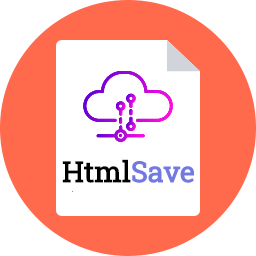

In [4]:
from GML import AutoNLP

In [5]:
import pandas as pd

In [6]:
#modified train file
#copy paste this in train.py file
#I have requested the owner to modify the train.py, hope he accepts my patch

import csv
import os
import argparse
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import numpy as np
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW, get_cosine_with_hard_restarts_schedule_with_warmup
import warnings
warnings.filterwarnings('ignore')

class MyDataset(Dataset):
    def __init__(self, data_file_name, data_dir='.data/'):
        super().__init__()

        data_path = os.path.join(data_file_name)

        self.data_list = []
        self.end_of_text_token = " <|endoftext|> "

        with open(data_path) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter='\t')

            for row in csv_reader:
                data_str = f"{row[0]}: {row[1]}{self.end_of_text_token}"
                self.data_list.append(data_str)

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, item):
        return self.data_list[item]

def get_data_loader(data_file_name):
    dataset = MyDataset(data_file_name)
    data_loader = DataLoader(dataset, batch_size=1, shuffle=True)
    return data_loader

def train(epochs, data_loader, batch_size, tokenizer, model, device):	
    batch_counter = 0
    sum_loss = 0.0

    for epoch in range(epochs):
        print (f'Running {epoch+1} epoch')

        for idx, txt in enumerate(data_loader):
            txt = torch.tensor(tokenizer.encode(txt[0]))
            txt = txt.unsqueeze(0).to(device)
            outputs = model(txt, labels=txt)
            loss, _ = outputs[:2]
            loss.backward()
            sum_loss += loss.data

            if idx%batch_size==0:
                batch_counter += 1
                optimizer.step()
                scheduler.step()
                optimizer.zero_grad()
                model.zero_grad()

            if batch_counter == 10:
                print(f"Total Loss is {sum_loss}") #printed after every 10*batch_size
                batch_counter = 0
                sum_loss = 0.0

    return model

def save_model(model, name):
    """
    Summary:
        Saving model to the Disk
    Parameters:
        model: Trained model object
        name: Name of the model to be saved
    """
    print ("Saving model to Disk")
    torch.save(model.state_dict(), f"{name}.pt")
    return

def load_models():
    """
    Summary:
        Loading Pre-trained model
    """
    print ('Loading/Downloading GPT-2 Model')
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium')
    model = GPT2LMHeadModel.from_pretrained('gpt2-medium')
    return tokenizer, model

if __name__ == '__main__':

    parser = argparse.ArgumentParser(description='Arguments for training Text Augmentation model')

    parser.add_argument('--epoch', default= 3,type=int, action='store', help='Number of epochs to run')
    parser.add_argument('--warmup', default=300, type=int, action='store', help='Number of warmup steps to run')
    parser.add_argument('--model_name', default='mymodel.pt', type=str, action='store', help='Name of the model file')
    parser.add_argument('--data_file', default='mydata.csv', type=str, action='store', help='Name of the data file')
    parser.add_argument('--batch', type=int, default=32, action='store', help='Batch size')
    parser.add_argument('--learning_rate', default=3e-5, type=float, action='store', help='Learning rate for the model')
    parser.add_argument('--max_len', default=200, type=int, action='store', help='Maximum length of sequence')
    args = parser.parse_args()

    BATCH_SIZE = args.batch
    EPOCHS = args.epoch
    LEARNING_RATE = args.learning_rate
    WARMUP_STEPS = args.warmup
    MAX_SEQ_LEN = args.max_len
    MODEL_NAME = args.model_name
    DATA_FILE = args.data_file

    TOKENIZER, MODEL = load_models()
    LOADER = get_data_loader(DATA_FILE)

    DEVICE = 'cpu'
    if torch.cuda.is_available():
        DEVICE = 'cuda'

    model = MODEL.to(DEVICE)
    model.train()
    optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
    scheduler = get_cosine_with_hard_restarts_schedule_with_warmup(optimizer, num_warmup_steps=WARMUP_STEPS, num_training_steps=-1)

    model = train(EPOCHS, LOADER, BATCH_SIZE, TOKENIZER, MODEL, DEVICE)
    save_model(model, MODEL_NAME)

usage: ipykernel_launcher.py [-h] [--epoch EPOCH] [--warmup WARMUP]
                             [--model_name MODEL_NAME] [--data_file DATA_FILE]
                             [--batch BATCH] [--learning_rate LEARNING_RATE]
                             [--max_len MAX_LEN]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/azureuser/.local/share/jupyter/runtime/kernel-f29ba678-2e48-48f6-b14f-10dd3b19e2d2.json


SystemExit: 2

In [ ]:
#copy paste this in generate.py file

import os
import argparse
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def choose_from_top_k_top_n(probs, k=50, p=0.8):
    ind = np.argpartition(probs, -k)[-k:]
    top_prob = probs[ind]
    top_prob = {i: top_prob[idx] for idx,i in enumerate(ind)}
    sorted_top_prob = {k: v for k, v in sorted(top_prob.items(), key=lambda item: item[1], reverse=True)}

    t=0
    f=[]
    pr = []
    for k,v in sorted_top_prob.items():
      t+=v
      f.append(k)
      pr.append(v)
      if t>=p:
          break
    top_prob = pr / np.sum(pr)
    token_id = np.random.choice(f, 1, p = top_prob)

    return int(token_id)

def generate(tokenizer, model, sentences, label):
    with torch.no_grad():
      for idx in range(sentences):
          finished = False
          cur_ids = torch.tensor(tokenizer.encode(label)).unsqueeze(0).to('cpu')
          for i in range(100):
              outputs = model(cur_ids, labels=cur_ids)
              loss, logits = outputs[:2]

              softmax_logits = torch.softmax(logits[0,-1], dim=0)

              if i < 5:
                  n = 10
              else:
                  n = 5

              next_token_id = choose_from_top_k_top_n(softmax_logits.to('cpu').numpy()) #top-k-top-n sampling
              cur_ids = torch.cat([cur_ids, torch.ones((1,1)).long().to(device) * next_token_id], dim = 1)

              if next_token_id in tokenizer.encode('<|endoftext|>'):
                  finished = True
                  break

          if finished:	          
              output_list = list(cur_ids.squeeze().to('cpu').numpy())
              output_text = tokenizer.decode(output_list)
              print (output_text)
          else:
              output_list = list(cur_ids.squeeze().to('cpu').numpy())
              output_text = tokenizer.decode(output_list)
              print (output_text)

def load_models(model_name):
    """
    Summary:
        Loading the trained model
    """
    print ('Loading Trained GPT-2 Model')
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium')
    model = GPT2LMHeadModel.from_pretrained('gpt2-medium')
    model_path = model_name
    model.load_state_dict(torch.load(model_path))
    return tokenizer, model

if __name__ == '__main__':

    parser = argparse.ArgumentParser(description='Arguments for inferencing Text Augmentation model')

    parser.add_argument('--model_name', default='mymodel.pt', type=str, action='store', help='Name of the model file')
    parser.add_argument('--sentences', type=int, default=5, action='store', help='Number of sentences in outputs')
    parser.add_argument('--label', type=str, action='store', help='Label for which to produce text')
    args = parser.parse_args()

    SENTENCES = args.sentences
    MODEL_NAME = args.model_name
    LABEL = args.label

    TOKENIZER, MODEL = load_models(MODEL_NAME)

    generate(TOKENIZER, MODEL, SENTENCES, LABEL)


In [10]:
os.chdir("/mnt/batch/tasks/shared/LS_root/mounts/clusters/dscpu/code/Users/Tamilselvan.S/Press Release/Data")

In [11]:
data = pd.read_csv("Cleaned_PR_TD.csv")

In [12]:
data["corpus"] = data["Title / Contents1"] + " " + data["Description1"]

In [13]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Category_label']= label_encoder.fit_transform(data['Category'])
  
data['Category_label'].unique()

array([3, 5, 2, 1, 6, 0, 7, 4])

In [14]:
X = data['corpus'].copy()
y = data['Category_label'].values

In [15]:
nlp = AutoNLP()

In [16]:
cleanX = X.apply(lambda x: nlp.clean(x))

In [17]:
cleanX = pd.DataFrame(cleanX, columns = ['corpus'])
cleanX = pd.concat([cleanX,data['Category_label']], axis=1)
cleanX

corpus  Category_label
0    ranked <number> brand finances latest report t...               3
1    effective april <number> <number> itelligence ...               3
2    publish digital thought leadership automotive ...               3
3    transformer neural networks shaking ai scott b...               5
4    achieves key aws partner network milestones pl...               3
..                                                 ...             ...
502  vr simulator learn speak public reduces fuel c...               6
503  uki appoints andy nelson head banking uki lead...               3
504  named leader <number> gartner® magic quadrantt...               1
505  named leader <number> gartner® magic quadrantt...               1
506  named leader <number> gartner® magic quadrantt...               1

[507 rows x 2 columns]

In [18]:
def trunc_text(x):
  if len(x) > 200:
    return x[:200]
  return x

cleanX['corpus'] = cleanX['corpus'].apply(lambda x: trunc_text(x))

In [19]:
cleanX.to_csv('data.csv',index=False)

In [20]:
nlp.augmentation_train('./data.csv')

Loading/Downloading GPT-2 Model


Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Running 1 epoch
Total Loss is 106.35916900634766
Total Loss is 121.89892578125
Total Loss is 136.4113311767578
Total Loss is 150.81118774414062
Total Loss is 147.37966918945312
Total Loss is 149.69375610351562
Total Loss is 143.49346923828125
Total Loss is 137.28793334960938
Total Loss is 141.16403198242188
Total Loss is 133.0718536376953
Total Loss is 127.78101348876953
Total Loss is 143.69725036621094
Total Loss is 130.61866760253906
Total Loss is 134.6547088623047
Total Loss is 132.91949462890625
Total Loss is 140.12977600097656
Total Loss is 129.31800842285156
Total Loss is 129.99789428710938
Total Loss is 136.2789306640625
Total Loss is 133.3878631591797
Total Loss is 125.35186767578125
Total Loss is 130.88607788085938


In [ ]:
nlp.set_params(cleanX['corpus'])
new_Text = nlp.augmentation_generate(y = cleanX['Category_label'], 
                                     SENTENCES = 40) # total 800 as we have 8 labels only

In [28]:
new_Text

Text labels
0                           ! insurance:<|endoftext|>      0
1   ! leader services leader practices culturalir ...      0
2   ! require insurance today named:ir < leadernum...      0
3   ! imperative vsized digital insurances reports...      0
4   !c culturalcpp practices business global fo in...      0
..                                                ...    ...
59  (emicemicis <number> globalnumber>s announced ...      7
60  ( cultural today 0  today leader today 5c glob...      7
61                                  ( v:<|endoftext|>      7
62  ( city client global to leader to 0 <number>: ...      7
63   ( sustainability  <number>:number>:<|endoftext|>      7

[64 rows x 2 columns]

In [30]:
new_Text["Category"] = label_encoder.inverse_transform(new_Text['labels'].astype(int))

In [25]:
label_encoder.inverse_transform(data['Category_label'])

array(['Corporate Information', 'Corporate Information', 'Corporate Information', 'Offering', ...,
       'Corporate Information', 'Award/Contest Winner', 'Award/Contest Winner', 'Award/Contest Winner'], dtype=object)

In [31]:
new_Text

Text labels  \
0                           ! insurance:<|endoftext|>      0   
1   ! leader services leader practices culturalir ...      0   
2   ! require insurance today named:ir < leadernum...      0   
3   ! imperative vsized digital insurances reports...      0   
4   !c culturalcpp practices business global fo in...      0   
..                                                ...    ...   
59  (emicemicis <number> globalnumber>s announced ...      7   
60  ( cultural today 0  today leader today 5c glob...      7   
61                                  ( v:<|endoftext|>      7   
62  ( city client global to leader to 0 <number>: ...      7   
63   ( sustainability  <number>:number>:<|endoftext|>      7   

                      Category  
0   AR Report / Market Insight  
1   AR Report / Market Insight  
2   AR Report / Market Insight  
3   AR Report / Market Insight  
4   AR Report / Market Insight  
..                         ...  
59                 Won Project  
60                 Won Project  
61                 Won Project  
62                 Won Project  
63                 Won Project  

[64 rows x 3 columns]

In [32]:
new_Text.to_csv("GPT8X8.csv", index = False)